In [23]:
import numpy as np
import pandas as pd
import seaborn as sns 

df = pd.read_csv('fertilizer.csv')
df

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [24]:
# df.loc[df["Fertilizer"] == "Urea", "Fertilizer"] = 1
# df.loc[df["Fertilizer"] == "DAP", "Fertilizer"] = 2
# df.loc[df["Fertilizer"] == "28-28", "Fertilizer"] = 3
# df.loc[df["Fertilizer"] == "14-35-14", "Fertilizer"] = 4
# df.loc[df["Fertilizer"] == "20-20", "Fertilizer"] = 5
# df.loc[df["Fertilizer"] == "17-17-17", "Fertilizer"] = 6
# df.loc[df["Fertilizer"] == "10-26-26", "Fertilizer"] = 7

df.loc[df["Soil_Type"] == "Loamy", "Soil_Type"] = 1
df.loc[df["Soil_Type"] == "Sandy", "Soil_Type"] = 2
df.loc[df["Soil_Type"] == "Clayey", "Soil_Type"] = 3
df.loc[df["Soil_Type"] == "Black", "Soil_Type"] = 4
df.loc[df["Soil_Type"] == "Red", "Soil_Type"] = 5

df.loc[df["Crop_Type"] == "Sugarcane", "Crop_Type"] = 1
df.loc[df["Crop_Type"] == "Cotton", "Crop_Type"] = 2
df.loc[df["Crop_Type"] == "Millets", "Crop_Type"] = 3
df.loc[df["Crop_Type"] == "Paddy", "Crop_Type"] = 4
df.loc[df["Crop_Type"] == "Pulses", "Crop_Type"] = 5
df.loc[df["Crop_Type"] == "Wheat", "Crop_Type"] = 6
df.loc[df["Crop_Type"] == "Tobacco", "Crop_Type"] = 7
df.loc[df["Crop_Type"] == "Barley", "Crop_Type"] = 8
df.loc[df["Crop_Type"] == "Oil seeds", "Crop_Type"] = 9
df.loc[df["Crop_Type"] == "Ground Nuts", "Crop_Type"] = 10
df.loc[df["Crop_Type"] == "Maize", "Crop_Type"] = 11

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Fertilizer'])
y = df['Fertilizer'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

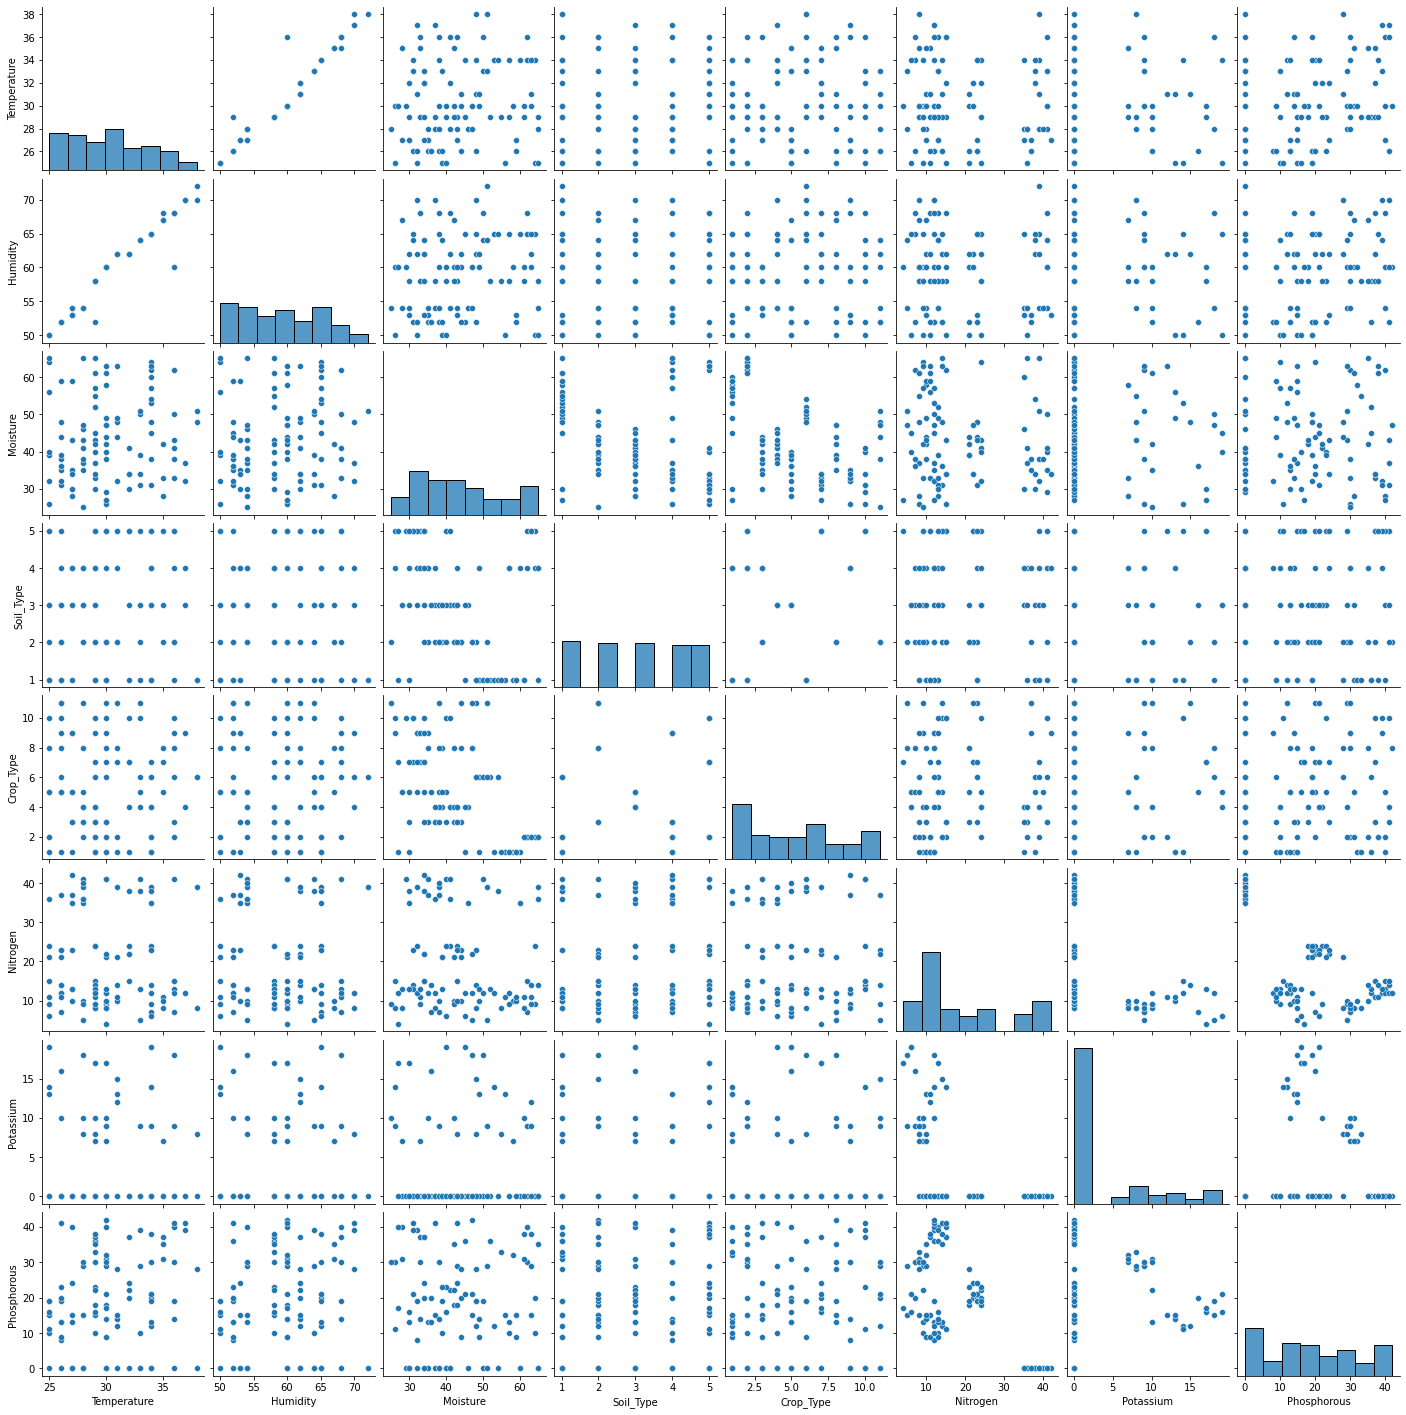

In [26]:
sns.pairplot(df)

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import naive_bayes
from sklearn import ensemble

#clf = KNeighborsClassifier(n_neighbors=4)

#clf = naive_bayes.GaussianNB()
#clf = naive_bayes.MultinomialNB()
#clf = naive_bayes.BernoulliNB()
#clf = naive_bayes.ComplementNB()
#clf = naive_bayes.CategoricalNB()

#clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)

#clf = svm.SVC(kernel='linear')
#clf = svm.LinearSVC(random_state=0, tol=1e-5, max_iter=1000000)
n_estimators = 10
clf = naive_bayes.GaussianNB()

from joblib import parallel_backend
with parallel_backend('threading', n_jobs=3):
    clf.fit(X_train, y_train)

# cvs = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
# print(cvs)
# print("Rata - rata:", np.mean(cvs))

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Akurasi:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

Akurasi: 1.0


In [31]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

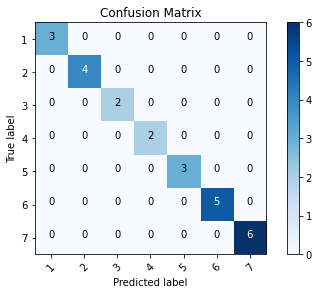

In [32]:
cm_plot_labels = ['1', '2', '3', '4', '5', '6', '7',]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [33]:
print ("Hasil Klasifikasi: \n", metrics.classification_report(y_test, y_pred, zero_division=1))

Hasil Klasifikasi: 
               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         2
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [34]:
# Xnew = [[50,30,70,20]]
# Ynew = clf.predict(Xnew)
# for i in range(len(Xnew)):
# 	print("X=%s, Predicted=%s" % (Xnew[i], Ynew[i]))